In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Описание колонок датасета
Данные клиента банка:

1 - Возраст (число)

2-Работа : тип работы (категориальный: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3-семейное положение: семейное положение (категориальное: "разведен", "женат", "холост", "неизвестен"; Примечание: "разведен" означает разведен или овдовел

4-образование (категориальное: базовое.4y', ' basic.6y', ' basic.9y', ' выссшая школа", "неграмотный", " профессионал.курс", " университет.степень", "неизвестно")

5-дефолт: есть ли кредит в дефолте? (категорически: "нет", "да", "неизвестно")

6-жилье: есть ли жилищный кредит? (категорически: "нет", "да", "неизвестно")

7 - кредита: личные кредит? (категорически: "нет", "да", "неизвестно".)

Связано с последним контактом текущей кампании:

8-контакт: тип контактной связи (категориальный: "сотовая связь", "телефон")

9-месяц: последний контакт месяц года (категорический: "январь", "февраль", "март",..., 'ноября', 'декабря")

10-day_of_week: последний контактный день недели (категорический: "пн", "вт", "ср", "чт", "пт")

11-длительность: длительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на выходную цель (например, если длительность=0, то y= "нет"). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти исходные данные должны включаться только для целей сравнения и должны быть отброшены, если намерение состоит в том, чтобы иметь реалистичную прогностическую модель.
прочие атрибуты:


12-кампания: количество контактов, выполненных в ходе этой кампании и для данного клиента (числовое, включает последний контакт)

13-pdays: количество дней, прошедших после того, как с клиентом в последний раз связывались из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)

14-предыдущий: количество контактов, выполненных до этой кампании и для данного клиента (числовое)

15-poutcome: результат предыдущей маркетинговой кампании (категорический: "неудача", "несуществующий", "успех")
атрибуты социального и экономического контекста


16-Эми.вар.ставка: коэффициент вариации занятости-квартальный показатель (числовой)

17-минусы.цена.индекс: индекс потребительских цен - ежемесячный показатель (числовой)

18-минусы.конф.idx: индекс потребительского доверия-месячный показатель (числовой)

19-euribor3m: EURIBOR 3 месячный курс-дневной индикатор (числовой)

20-число занятых: численность работников-квартальный показатель (числовой)

Выходная переменная (желаемая цель):


21-й-оформил ли клиент срочный депозит? (двоичный код: "Да", "нет")

In [2]:
df=pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

У нас довольно большой датасет, посмотрим, везде ли стоят значения

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Данные полные, что радует, идём дальше, изучим тип данных

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

В дальнейшем нам нужно будет привезти к числовому виду данные для машинного обучения, но будем делать это поэтапно и погружаться в анализ данных

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Посмотрим на распределение некоторых колонок

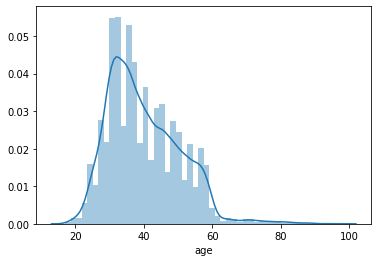

In [7]:
sns.distplot(df['age'])


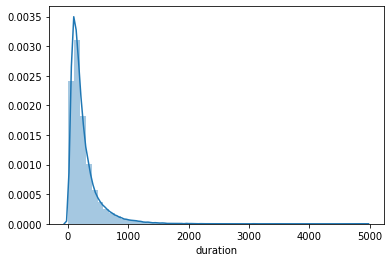

In [8]:
sns.distplot(df['duration'])


По колонке "duration", мы держим в уме что диапозон значений очень большой, в дальнейшем в целях повышения точности МО, мы можем это использовать

In [9]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [10]:
df.groupby('education',as_index=False).agg({'age':'mean', 'duration':'mean'})

,education,age,duration
0,basic.4y,47.596504,264.827826
1,basic.6y,40.448953,264.414485
2,basic.9y,39.061208,261.291811
3,high.school,37.998213,260.886810
4,illiterate,48.500000,276.777778
5,professional.course,40.080107,252.533855
6,university.degree,38.879191,253.223373
7,unknown,43.481225,262.390526


Начнм агрегацию данных по выборочным колонкам и искать какие либо закономерности. В данном случае агрегация по колонке "duration" не несет смысловой нагрузки, распределение средних значений по вохзрасту уже интереснее, но пока мы не касаемся целевой колонки

In [11]:
df.groupby('y',as_index=False).agg({'age':'mean', 'duration':'mean'})

,y,age,duration
0,no,39.911185,220.844807
1,yes,40.913147,553.191164


Применительно к целевой ячейке мы видим, что значение в колонке "duration" имеет большое значение при решение о депозите

In [12]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

Для дальнейшей агрегации данных начнем приводить колонки в числовой вид

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['y']= labelencoder.fit_transform(df['y']) 

In [14]:
df.groupby('job',as_index=False).agg({'age':'mean', 'duration':'mean', 'y':'mean'}).sort_values('y', ascending = False)

,job,age,duration,y
8,student,25.894857,283.683429,0.314286
5,retired,62.027326,273.712209,0.252326
10,unemployed,39.733728,249.451677,0.142012
0,admin.,38.187296,254.312128,0.129726
4,management,42.362859,257.058140,0.112175
11,unknown,45.563636,239.675758,0.112121
9,technician,38.507638,250.232241,0.108260
6,self-employed,39.949331,264.142153,0.104856
3,housemaid,45.500000,250.454717,0.100000
2,entrepreneur,41.723214,263.267857,0.085165


In [15]:
df.groupby('job',as_index=False).agg({'y':'count'})

,job,y
0,admin.,10422
1,blue-collar,9254
2,entrepreneur,1456
3,housemaid,1060
4,management,2924
5,retired,1720
6,self-employed,1421
7,services,3969
8,student,875
9,technician,6743


In [16]:
sravn_count = df.groupby('job',as_index=False).agg({'y':'count'}) 
sravn_sum = df.groupby('job',as_index=False).agg({'y':'sum'})

In [17]:
sravn=sravn_sum.y/sravn_count.y*100
sravn

0     12.972558
1      6.894316
2      8.516484
3     10.000000
4     11.217510
5     25.232558
6     10.485574
7      8.138070
8     31.428571
9     10.826042
10    14.201183
11    11.212121
Name: y, dtype: float64

In [20]:
sravn_sum['Отношение']=sravn
sravn_sum

,job,y,Отношение
0,admin.,1352,12.972558
1,blue-collar,638,6.894316
2,entrepreneur,124,8.516484
3,housemaid,106,10.000000
4,management,328,11.217510
5,retired,434,25.232558
6,self-employed,149,10.485574
7,services,323,8.138070
8,student,275,31.428571
9,technician,730,10.826042


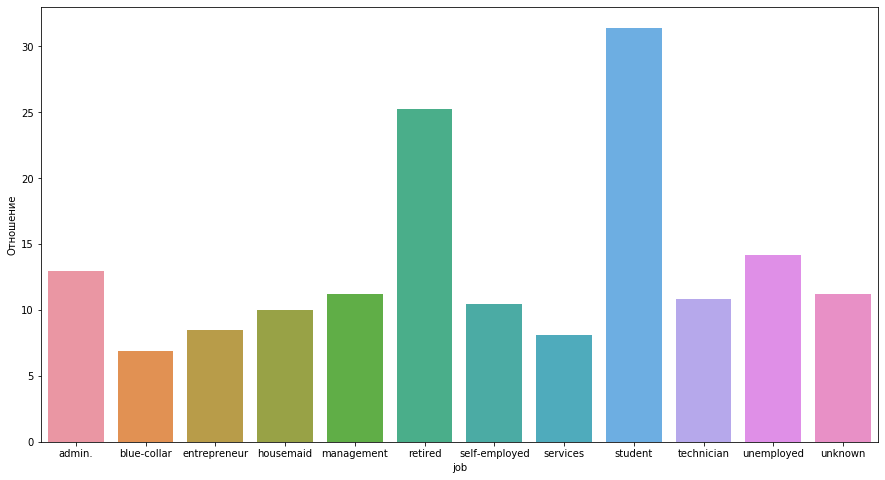

In [26]:
plt.subplots(figsize=(15,8))
sns.barplot(x='job', y='Отношение', data=sravn_sum)

Мы видим, что положительное решение о депозите принимают студенты, безработные, люди находящиеся в отставке исходя из отношения положительных ответов к выборке

In [ ]:
df.groupby('education',as_index=False).agg({'y':'count'}).plot.bar(x='education')

In [34]:
sravn_count_ed = df.groupby('education',as_index=False).agg({'y':'count'}) 
sravn_sum_ed = df.groupby('education',as_index=False).agg({'y':'sum'})
sravn_ed=sravn_sum_ed.y/sravn_count_ed.y*100
sravn_count_ed['Отношение']=sravn_ed
sravn_count_ed

,education,y,Отношение
0,basic.4y,4176,10.249042
1,basic.6y,2292,8.202443
2,basic.9y,6045,7.824648
3,high.school,9515,10.835523
4,illiterate,18,22.222222
5,professional.course,5243,11.348465
6,university.degree,12168,13.724523
7,unknown,1731,14.500289


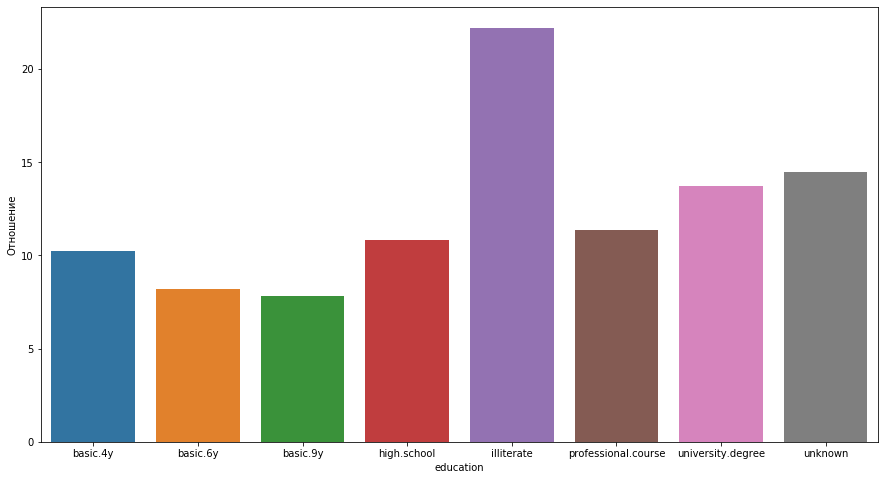

In [35]:
plt.subplots(figsize=(15,8))
sns.barplot(x='education', y='Отношение', data=sravn_count_ed)

Наиболее часто положительное решение о депозите у людей с уровнем образования "illiterate" 

In [36]:
sravn_count_m = df.groupby('marital',as_index=False).agg({'y':'count'}) 
sravn_sum_m = df.groupby('marital',as_index=False).agg({'y':'sum'})
sravn_m=sravn_sum_m.y/sravn_count_m.y*100
sravn_count_m['Отношение']=sravn_m
sravn_count_m

,marital,y,Отношение
0,divorced,4612,10.320902
1,married,24928,10.157253
2,single,11568,14.004149
3,unknown,80,15.000000


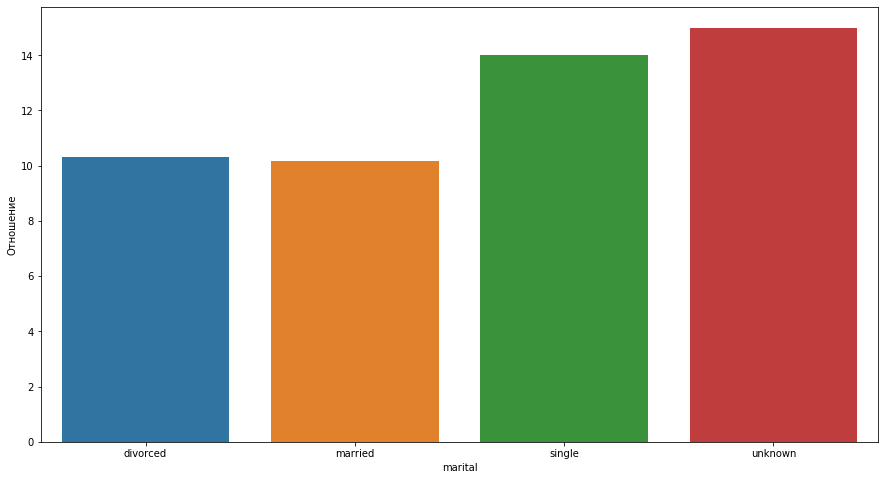

In [40]:
plt.subplots(figsize=(15,8))
sns.barplot(x='marital', y='Отношение', data=sravn_count_m)

Также можно заметить, что в данном датасете наибольшее число депозитов приходится на одиноких людей

In [41]:
df_2=pd.get_dummies(df)

Получим числовые значения для всех столбцов и начнем обучать модель

In [42]:
df_2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [43]:
y=df_2.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [44]:
X=df_2.drop(['y'], axis=1)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Попробуем методом случайных лесов подобрать оптимальные параметры

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 7, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_model=rfclassifier.predict(X_test)
accuracy_score (y_test, y_model)

0.9106579266812334

При первоначальном подходе точность выше 90%, что явлется не плохим результатом, проанализируем работу алгоритма

In [48]:
scores_data= pd.DataFrame()
max_depth_values = range(1, 50)
for max_depth in max_depth_values:
    rfclassifier = RandomForestClassifier(criterion='entropy', max_depth=max_depth)
    rfclassifier.fit(X_train,y_train)
    train_score=rfclassifier.score(X_train,y_train)
    test_score=rfclassifier.score(X_test,y_test)
    
    temp_score_data=pd.DataFrame({'max_depth' : [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    
    scores_data=scores_data.append(temp_score_data)

In [49]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.887071,0.888444
0,2,0.887071,0.888444
0,3,0.899363,0.900218
0,4,0.901335,0.900947
0,5,0.902458,0.901554


In [50]:
scores_data_long=pd.melt(scores_data, id_vars =['max_depth'], value_vars = ['train_score', 'test_score'], 
                                                                           var_name ='set_type', value_name='score') 

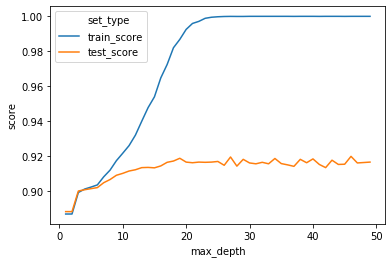

In [51]:
sns.lineplot(x='max_depth', y= 'score', hue='set_type', data=scores_data_long)

Начиная примерно с 15-17 шага глубины дерева, результат не увеличивается, посмотрим на числовые значения

In [52]:
scores_data_long.sort_values('score', ascending = False)

,max_depth,set_type,score
47,48,train_score,1.000000
39,40,train_score,1.000000
29,30,train_score,1.000000
30,31,train_score,1.000000
31,32,train_score,1.000000
...,...,...,...
2,3,train_score,0.899363
49,1,test_score,0.888444
50,2,test_score,0.888444
1,2,train_score,0.887071


In [53]:
scores_data_long.query("set_type == 'test_score'").sort_values('score', ascending = False)

,max_depth,set_type,score
94,46,test_score,0.920005
75,27,test_score,0.919641
67,19,test_score,0.918912
82,34,test_score,0.918791
88,40,test_score,0.918548
86,38,test_score,0.918305
77,29,test_score,0.918305
91,43,test_score,0.917820
66,18,test_score,0.917334
73,25,test_score,0.917092


In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfclassifier , X_train,y_train, cv=5)

array([0.90925645, 0.91092564, 0.91047041, 0.907739  , 0.91942337])

При помощи кросс-валидации была получена оценка точности модели, как видно из результатов, точность не опускается ниже 90%

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 17, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)
rf_cvs_acc = cross_val_score(estimator = rfclassifier, X = X_train, y = y_train, cv = 10)
rf_cvs_acc.mean()

0.909165402124431

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
clf = tree.DecisionTreeClassifier()
parametrs= {'criterion': ['gini', 'entropy'], 'max_depth': range(1,17)}

In [57]:
clf_rf= RandomForestClassifier()
grid_search_cv_clf=GridSearchCV(clf_rf, parametrs, cv=5)

In [58]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [59]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [60]:
best_clf=grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.9151493080844866

При помощи GridSearchCV, мы добились увеличения точности оценки модели, но не значительно

In [61]:
feature_importances = best_clf.feature_importances_

In [62]:
feature_importances_df=pd.DataFrame({'feature':list(X_train),
                                    'feature_importances':feature_importances})

In [63]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
1,duration,0.297598
8,euribor3m,0.098710
9,nr.employed,0.075175
0,age,0.053496
3,pdays,0.040380
...,...,...
21,job_unknown,0.001437
47,month_dec,0.001024
25,marital_unknown,0.000506
30,education_illiterate,0.000235


Получаем оценку важности фичей для предсказания

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.894


In [65]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10,
                        random_state=1).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train, y_train)
    score = pipe_lr.score(X_train, y_train)
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fold:  1, Class dist.: [29229  3721], Acc: 0.893
Fold:  2, Class dist.: [29229  3721], Acc: 0.893
Fold:  3, Class dist.: [29229  3721], Acc: 0.893
Fold:  4, Class dist.: [29229  3721], Acc: 0.893
Fold:  5, Class dist.: [29229  3721], Acc: 0.893
Fold:  6, Class dist.: [29229  3721], Acc: 0.893
Fold:  7, Class dist.: [29229  3721], Acc: 0.893
Fold:  8, Class dist.: [29229  3721], Acc: 0.893
Fold:  9, Class dist.: [29229  3721], Acc: 0.893
Fold: 10, Class dist.: [29229  3721], Acc: 0.893

CV accuracy: 0.893 +/- 0.000


При попытке понижения размерности данных и обучения модели логистической регрессии, результат не увеличился в точности

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


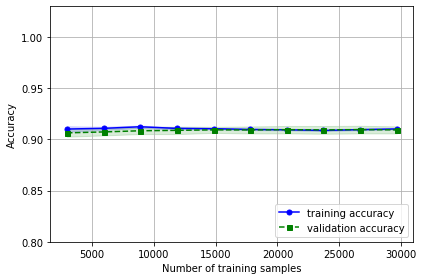

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

Серьёзных расхождений на графике нет, модель работает корректно

In [67]:
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(grid_search_cv_clf, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV accuracy: 0.911 +/- 0.003


Пока остановится в обучении моделей и настройки гиперпараметров, наиболее эффективным показала себя модель случайного леса 